<a href="https://colab.research.google.com/github/vkjadon/python/blob/main/sympyIntro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
t, g, l = sp.symbols('t g l', positive=True)
theta = sp.Function('theta')

eq = sp.Eq(sp.diff(theta(t), t, 2) + (g/l)*theta(t), 0)

solution = sp.dsolve(eq)
solution

Eq(theta(t), C1*sin(sqrt(g)*t/sqrt(l)) + C2*cos(sqrt(g)*t/sqrt(l)))

In [3]:
theta_expr = solution.rhs
theta_expr


C1*sin(sqrt(g)*t/sqrt(l)) + C2*cos(sqrt(g)*t/sqrt(l))

In [4]:
theta_dot = sp.diff(theta_expr, t)

In [5]:
eq1 = theta_expr.subs(t, 0) - 0.2
eq2 = theta_dot.subs(t, 0) - 0

In [10]:
a, b = sp.symbols('C1 C2')
constants = sp.solve([eq1, eq2], [a, b])
constants


{C1: 0.0, C2: 0.200000000000000}

In [11]:
theta_expr_ic = theta_expr.subs(constants)
theta_expr_ic


0.2*cos(sqrt(g)*t/sqrt(l))

In [13]:
theta_expr_num = theta_expr_ic.subs({g: 9.81, l: 1.0})
theta_expr_num

0.2*cos(3.13209195267317*t)

In [14]:
theta_func = sp.lambdify(t, theta_expr_num, modules='numpy')

In [15]:
t_vals = np.linspace(0, 10, 400)
theta_vals = theta_func(t_vals)

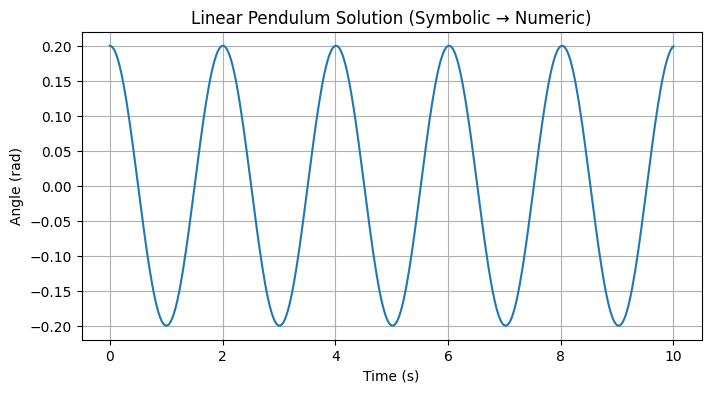

In [16]:
plt.figure(figsize=(8,4))
plt.plot(t_vals, theta_vals)
plt.xlabel("Time (s)")
plt.ylabel("Angle (rad)")
plt.title("Linear Pendulum Solution (Symbolic → Numeric)")
plt.grid()
plt.show()


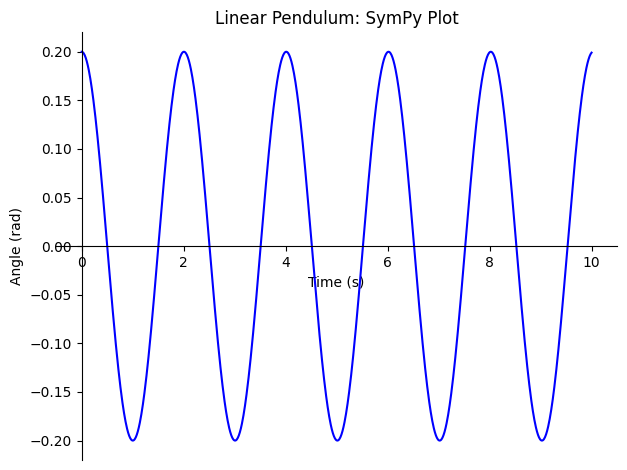

In [17]:
sp.plot(
    theta_expr_num,
    (t, 0, 10),
    title="Linear Pendulum: SymPy Plot",
    xlabel="Time (s)",
    ylabel="Angle (rad)",
    line_color='blue'
)
